In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import re
import nltk
import spacy
import string
#import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/CSE-373_AFN1/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
df.drop(['Resume_html'],axis=1,inplace=True)
df.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [6]:
df.to_csv('raw_data.csv', index=False)

In [7]:
df1=pd.read_csv('/content/raw_data.csv')
df1.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [8]:
df.isnull().sum()

,0
ID,0
Resume_str,0
Category,0


In [9]:
df["Resume_str"][1]


"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [10]:
df['Word_Count'] = df['Resume_str'].apply(lambda x: len(str(x).split(" ")))
df[['Resume_str','Word_Count']].head()

,Resume_str,Word_Count
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,1084
1,"HR SPECIALIST, US HR OPERATIONS ...",1060
2,HR DIRECTOR Summary Over 2...,1365
3,HR SPECIALIST Summary Dedica...,578
4,HR MANAGER Skill Highlights ...,1491


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   Resume_str  2484 non-null   object
 2   Category    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [12]:
df1['Char_Count'] = df1['Resume_str'].str.len()
df1[['Resume_str','Char_Count']]



,Resume_str,Char_Count
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,5442
1,"HR SPECIALIST, US HR OPERATIONS ...",5572
2,HR DIRECTOR Summary Over 2...,7720
3,HR SPECIALIST Summary Dedica...,2855
4,HR MANAGER Skill Highlights ...,9172
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,5533
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",7108
2481,GEEK SQUAD AGENT Professional...,2020
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,5074


In [13]:
pip install nltk

In [14]:
from nltk.corpus import stopwords
#import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df1['Stopwords']=df1['Resume_str'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Resume_str','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Resume_str,Stopwords
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,135
1,"HR SPECIALIST, US HR OPERATIONS ...",144
2,HR DIRECTOR Summary Over 2...,266
3,HR SPECIALIST Summary Dedica...,98
4,HR MANAGER Skill Highlights ...,294


In [15]:
df1['Neumerics'] = df1['Resume_str'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df1[['Resume_str','Neumerics']].head()

,Resume_str,Neumerics
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,16
1,"HR SPECIALIST, US HR OPERATIONS ...",5
2,HR DIRECTOR Summary Over 2...,9
3,HR SPECIALIST Summary Dedica...,10
4,HR MANAGER Skill Highlights ...,16


In [16]:
df1['Uppercase'] = df1['Resume_str'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df1[['Resume_str','Uppercase']].head()

,Resume_str,Uppercase
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,15
1,"HR SPECIALIST, US HR OPERATIONS ...",20
2,HR DIRECTOR Summary Over 2...,44
3,HR SPECIALIST Summary Dedica...,5
4,HR MANAGER Skill Highlights ...,57


In [18]:
df1['Title'] = df1['Resume_str'].apply(lambda x: len([x for x in x.split() if x.istitle()]))
df1[['Resume_str','Title']].head()

,Resume_str,Title
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,181
1,"HR SPECIALIST, US HR OPERATIONS ...",147
2,HR DIRECTOR Summary Over 2...,261
3,HR SPECIALIST Summary Dedica...,101
4,HR MANAGER Skill Highlights ...,218


In [19]:
df1['Special_Char'] = df1['Resume_str'].apply(lambda x: len([x for x in x.split() if x.isalnum()]))
df1[['Resume_str','Special_Char']].head()

,Resume_str,Special_Char
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,526
1,"HR SPECIALIST, US HR OPERATIONS ...",580
2,HR DIRECTOR Summary Over 2...,831
3,HR SPECIALIST Summary Dedica...,329
4,HR MANAGER Skill Highlights ...,943


In [20]:
import numpy as np
df1['Avg_Word_Length'] = df1['Resume_str'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df1[['Resume_str','Avg_Word_Length']].head()

,Resume_str,Avg_Word_Length
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,6.459941
1,"HR SPECIALIST, US HR OPERATIONS ...",6.307910
2,HR DIRECTOR Summary Over 2...,6.218289
3,HR SPECIALIST Summary Dedica...,5.997361
4,HR MANAGER Skill Highlights ...,6.368159


In [21]:
df1.head()

,ID,Resume_str,Category,Char_Count,Stopwords,Neumerics,Uppercase,Lowercase,Title,Special_Char,Avg_Word_Length
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,5442,135,16,15,434,181,526,6.459941
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,5572,144,5,20,498,147,580,6.307910
2,33176873,HR DIRECTOR Summary Over 2...,HR,7720,266,9,44,682,261,831,6.218289
3,27018550,HR SPECIALIST Summary Dedica...,HR,2855,98,10,5,254,101,329,5.997361
4,17812897,HR MANAGER Skill Highlights ...,HR,9172,294,16,57,892,218,943,6.368159


In [22]:
def proprocessing_steps(Sentences):
  Sentences = str(Sentences)
  Sentences =Sentences.lower()
  Sentences = Sentences.replace('{html}','')
  cleanr= re.compile('<.*?>')
  cleantext=re.sub(cleanr,'',Sentences)
  rem_url=re.sub(r'http\S+','',cleantext)
  rem_num=re.sub('[0-9]+','',rem_url)
  tokenizer=RegexpTokenizer(r'\w+')
  tokens=tokenizer.tokenize(rem_num)
  filtered_words=[w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
  return " ".join(filtered_words)

In [ ]:
df1.drop_duplicates(subset=['Resume_str'], keep=False)
df1.head(10)

In [23]:
Raw_data=pd.read_csv('/content/raw_data.csv')
Raw_data['Resume_str']=Raw_data['Resume_str'].apply(lambda x:proprocessing_steps(x))

In [24]:
Raw_data.head()

,ID,Resume_str,Category
0,16852973,administrator marketing associate administrato...,HR
1,22323967,specialist operations summary versatile media ...,HR
2,33176873,director summary years experience recruiting p...,HR
3,27018550,specialist summary dedicated driven dynamic ye...,HR
4,17812897,manager skill highlights skills department sta...,HR


In [25]:
Raw_data.drop(['ID'],axis=1,inplace=True)
Raw_data.head()

,Resume_str,Category
0,administrator marketing associate administrato...,HR
1,specialist operations summary versatile media ...,HR
2,director summary years experience recruiting p...,HR
3,specialist summary dedicated driven dynamic ye...,HR
4,manager skill highlights skills department sta...,HR


In [26]:
Raw_data.to_csv('processed_data.csv')
Raw_data.head()

,Resume_str,Category
0,administrator marketing associate administrato...,HR
1,specialist operations summary versatile media ...,HR
2,director summary years experience recruiting p...,HR
3,specialist summary dedicated driven dynamic ye...,HR
4,manager skill highlights skills department sta...,HR


In [27]:
Raw_data.Resume_str[3]

'specialist summary dedicated driven dynamic years customer service expertise motivated maintain customer satisfaction contribute company success emphasis personnel process management solid team player proven ability establish rapport clients skills type wpm key touch microsoft programs word excel access outlook powerpoint personnel management telephone inquiries specialist excellent customer service skills call quality customer satisfaction primary focus inbound outbound contact center experience excellent oral written presentation seasoned conflict resolution experience specialist may oct company name city state accenture peopleline email management team received inbound emails clients initial point contact answer questions related policies practices resolve issues helped client answering inquiry resolving issue routing email caseworker resolution recorded tracked client issue via case management tool initiation resolution maintained records customer interactions transactions documen

In [28]:
Raw_data['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
FINANCE,118
ADVOCATE,118
ACCOUNTANT,118
ENGINEERING,118
CHEF,118
AVIATION,117
FITNESS,117


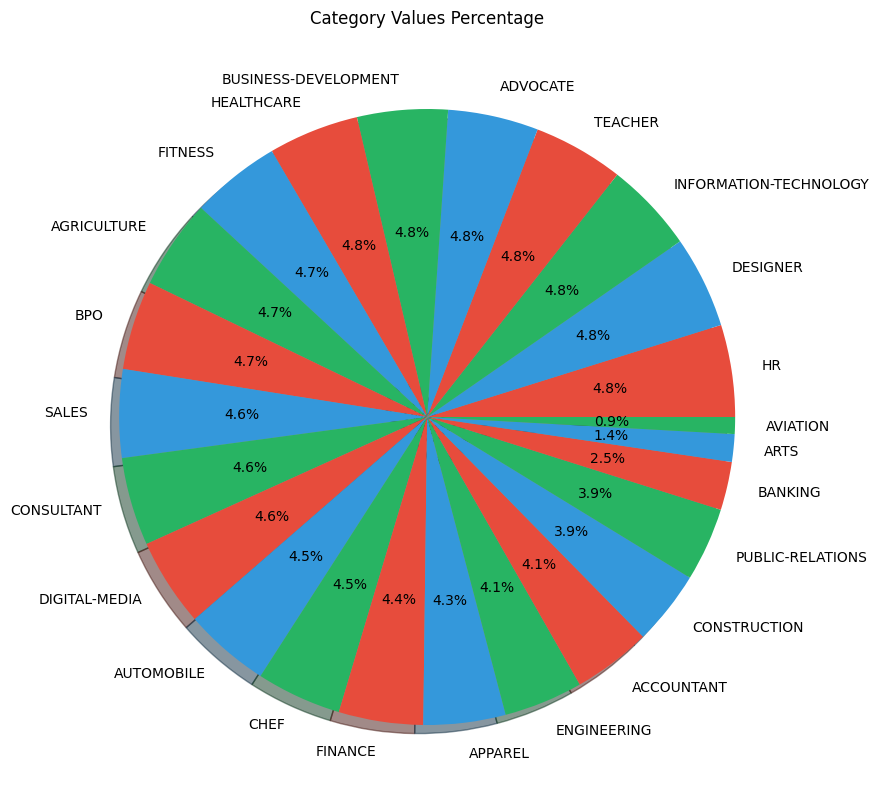

In [29]:
counts=Raw_data['Category'].value_counts()
labels=Raw_data['Category'].unique()
plt.figure(figsize=(13,10))
color=['#e74c3c','#3498db','#28b463']
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=color)
plt.title('Category Values Percentage')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(Raw_data['Category'])
Raw_data['Category']=label.transform(Raw_data['Category'])
Raw_data.head()

,Resume_str,Category
0,administrator marketing associate administrato...,19
1,specialist operations summary versatile media ...,19
2,director summary years experience recruiting p...,19
3,specialist summary dedicated driven dynamic ye...,19
4,manager skill highlights skills department sta...,19


In [31]:
Raw_data.Category.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(Raw_data['Resume_str'])
requredText = tfidf.transform(Raw_data['Resume_str'])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X, y_train, Y = train_test_split(requredText, Raw_data['Category'], test_size=0.3, random_state=45,stratify=Raw_data['Category'])
X_val, X_test, Y_val, Y_test = train_test_split(X,Y, test_size=0.5, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

##**MODEL--- KNN**##

In [72]:
Knn = KNeighborsClassifier(n_neighbors=42)
Knn.fit(X_train, y_train)

y_pred_val = Knn.predict(X_val)
val_accuracy_knn = accuracy_score(Y_val, y_pred_val)

y_pred = Knn.predict(X_test)
accuracy_On_knn = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_knn = confusion_matrix(Y_test, y_pred)



precision_knn = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_knn = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_knn = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_knn = round(accuracy_score(Y_test,y_pred),4)

              precision    recall  f1-score   support

           0       0.45      0.87      0.59        15
           1       0.25      0.12      0.17        16
           2       1.00      0.33      0.50         9
           3       0.25      0.08      0.12        13
           4       0.67      0.12      0.20        17
           5       0.00      0.00      0.00         4
           6       0.73      0.48      0.58        23
           7       0.43      0.38      0.40        16
           8       0.00      0.00      0.00         3
           9       0.41      0.74      0.53        19
          10       0.78      0.78      0.78        18
          11       0.71      0.71      0.71        14
          12       0.33      0.07      0.11        15
          13       0.92      0.65      0.76        17
          14       0.47      0.54      0.50        13
          15       0.57      0.50      0.53        16
          16       0.50      0.39      0.44        18
          17       0.88    

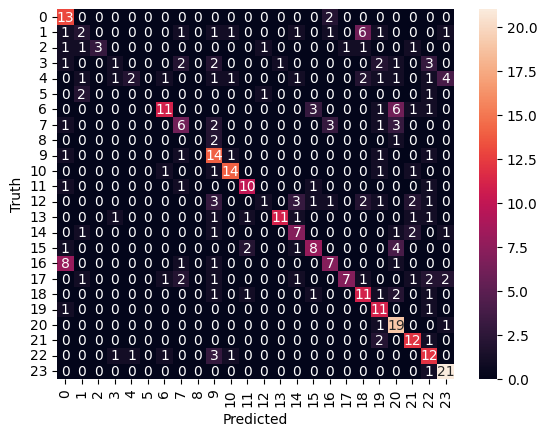

In [73]:
sns.heatmap(CM_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [74]:
print(f'Validation Accuracy: {val_accuracy_knn:.2f}')
print('Accuracy Score  : ', accuracy_knn)
print('Precision Score : ', precision_knn)
print('Recall Score    : ', recall_knn)
print('f1-Score        : ', f1_knn)

Validation Accuracy: 0.52
Accuracy Score  :  0.5442
Precision Score :  0.5195
Recall Score    :  0.4941
f1-Score        :  0.466


##**SVM**##

In [75]:
#Train on Training set
Svm = SVC()
Svm.fit(X_train, y_train)
#Further evaluate on validation set
y_pred_val = Svm.predict(X_val)
val_accuracy_svm = accuracy_score(Y_val, y_pred_val)
#Performance measurment on test set
y_pred = Svm.predict(X_test)
accuracy_svm = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_svm = confusion_matrix(Y_test, y_pred)

precision_svm = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_svm = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_svm = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_svm = round(accuracy_score(Y_test,y_pred),4)

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.24      0.31      0.27        16
           2       0.75      0.33      0.46         9
           3       0.00      0.00      0.00        13
           4       0.43      0.35      0.39        17
           5       0.00      0.00      0.00         4
           6       0.71      0.65      0.68        23
           7       0.50      0.56      0.53        16
           8       0.00      0.00      0.00         3
           9       0.56      0.74      0.64        19
          10       0.86      0.67      0.75        18
          11       0.92      0.79      0.85        14
          12       0.18      0.27      0.22        15
          13       0.87      0.76      0.81        17
          14       0.54      0.54      0.54        13
          15       0.58      0.69      0.63        16
          16       0.80      0.67      0.73        18
          17       1.00    

Text(50.722222222222214, 0.5, 'Truth')

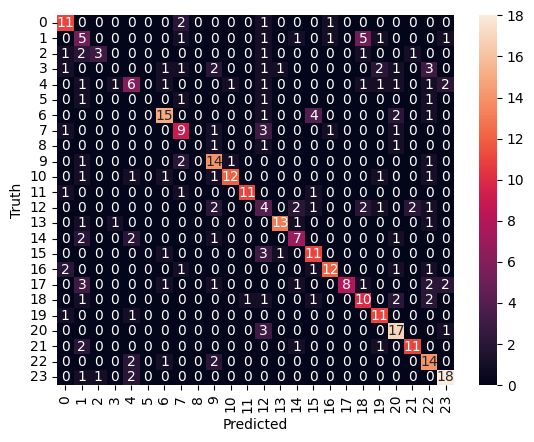

In [77]:
sns.heatmap(CM_svm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [78]:
print(f'Validation Accuracy: {val_accuracy_svm:.2f}')
print('Accuracy Score  : ', accuracy_svm)
print('Precision Score : ', precision_svm)
print('Recall Score    : ', recall_svm)
print('f1-Score        : ', f1_svm)

Validation Accuracy: 0.60
Accuracy Score  :  0.5952
Precision Score :  0.5542
Recall Score    :  0.5409
f1-Score        :  0.5339


##**RANDOM FOREST**##

In [79]:
#TRAIN ON TRAINING SET
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
#Further evaluate on validation set
y_pred_val = RF.predict(X_val)
val_accuracy_rf = accuracy_score(Y_val, y_pred_val)
#Performance measure on Test set
y_pred = RF.predict(X_test)
accuracy_RF = accuracy_score(Y_test, y_pred)


print((classification_report(Y_test, y_pred)))
#Score = RF.score(X_test, Y_test)
CM = confusion_matrix(Y_test, y_pred)


precision_rf = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_rf = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_rf = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_rf = round(accuracy_score(Y_test,y_pred),4)


              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.50      0.31      0.38        16
           2       1.00      0.33      0.50         9
           3       0.00      0.00      0.00        13
           4       0.67      0.12      0.20        17
           5       1.00      0.25      0.40         4
           6       0.73      0.70      0.71        23
           7       0.44      0.50      0.47        16
           8       0.00      0.00      0.00         3
           9       0.45      0.68      0.54        19
          10       0.88      0.78      0.82        18
          11       0.85      0.79      0.81        14
          12       0.33      0.07      0.11        15
          13       0.80      0.94      0.86        17
          14       0.43      0.46      0.44        13
          15       0.58      0.69      0.63        16
          16       0.75      0.67      0.71        18
          17       0.91    

Text(50.722222222222214, 0.5, 'Truth')

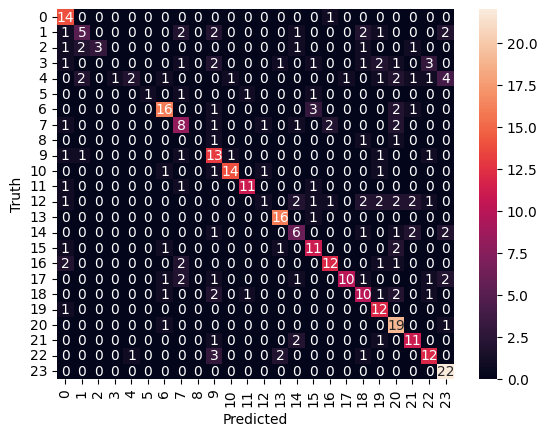

In [80]:
sns.heatmap(CM,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [81]:
print(f'Validation Accuracy: {val_accuracy_rf:.2f}')
print('Accuracy Score  : ', accuracy_rf)
print('Precision Score : ', precision_rf)
print('Recall Score    : ', recall_rf)
print('f1-Score        : ', f1_rf)

Validation Accuracy: 0.59
Accuracy Score  :  0.6139
Precision Score :  0.5963
Recall Score    :  0.562
f1-Score        :  0.5384


##**DECISION TREE**##

In [82]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train, y_train)

y_pred_val = DT.predict(X_val)
val_accuracy_dt = accuracy_score(Y_val, y_pred_val)

y_pred = DT.predict(X_test)
accuracy_DT = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_DT = confusion_matrix(Y_test, y_pred)

precision_DT = round(precision_score(Y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(Y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(Y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(Y_test,y_pred),2)

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.67      0.38      0.48        16
           2       0.33      0.33      0.33         9
           3       0.17      0.15      0.16        13
           4       0.22      0.24      0.23        17
           5       0.25      0.25      0.25         4
           6       0.81      0.74      0.77        23
           7       0.44      0.44      0.44        16
           8       0.00      0.00      0.00         3
           9       0.32      0.32      0.32        19
          10       0.82      0.78      0.80        18
          11       0.71      0.71      0.71        14
          12       0.20      0.13      0.16        15
          13       0.88      0.88      0.88        17
          14       0.56      0.38      0.45        13
          15       0.57      0.75      0.65        16
          16       0.48      0.67      0.56        18
          17       0.64    

Text(50.722222222222214, 0.5, 'Truth')

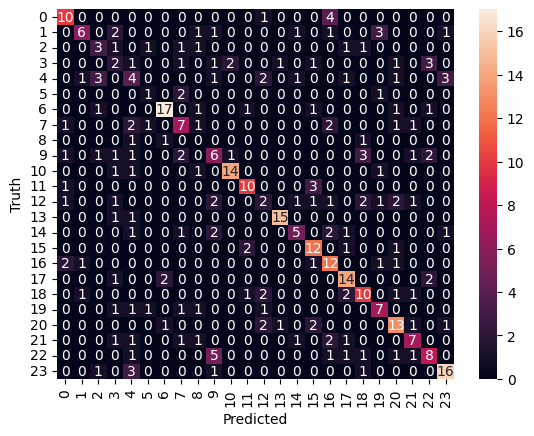

In [83]:
sns.heatmap(CM_DT,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [84]:
print(f'Validation Accuracy: {val_accuracy_dt:.2f}')
print('Accuracy Score  : ', accuracy_DT)
print('Precision Score : ', precision_DT)
print('Recall Score    : ', recall_DT)
print('f1-Score        : ', f1_DT)

Validation Accuracy: 0.57
Accuracy Score  :  0.54
Precision Score :  0.5
Recall Score    :  0.5
f1-Score        :  0.49


#**Logistic Regression**#

In [85]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)
val_accuracy_lr = accuracy_score(Y_val, y_pred_val)

y_pred = lr.predict(X_test)
accuracy_lgr = accuracy_score(Y_test, y_pred)


print((lr,classification_report(Y_test, y_pred)))
CM_lr = confusion_matrix(Y_test, y_pred)


precision_lr = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_lr = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_lr = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_lr = round(accuracy_score(Y_test,y_pred),4)

(LogisticRegression(), '              precision    recall  f1-score   support\n\n           0       0.63      0.80      0.71        15\n           1       0.40      0.38      0.39        16\n           2       0.75      0.33      0.46         9\n           3       0.00      0.00      0.00        13\n           4       0.57      0.24      0.33        17\n           5       0.00      0.00      0.00         4\n           6       0.67      0.61      0.64        23\n           7       0.47      0.56      0.51        16\n           8       0.00      0.00      0.00         3\n           9       0.58      0.79      0.67        19\n          10       0.88      0.78      0.82        18\n          11       0.85      0.79      0.81        14\n          12       0.29      0.13      0.18        15\n          13       0.82      0.82      0.82        17\n          14       0.62      0.62      0.62        13\n          15       0.60      0.75      0.67        16\n          16       0.71      0.67      

Text(50.722222222222214, 0.5, 'Truth')

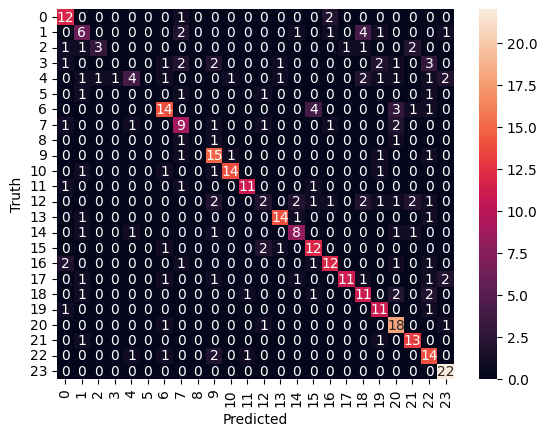

In [86]:
sns.heatmap(CM_lr,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [87]:
print(f'Validation Accuracy: {val_accuracy_lr:.2f}')
print('Accuracy Score  : ', accuracy_lr)
print('Precision Score : ', precision_lr)
print('Recall Score    : ', recall_lr)
print('f1-Score        : ', f1_lr)

Validation Accuracy: 0.64
Accuracy Score  :  0.6327
Precision Score :  0.558
Recall Score    :  0.5731
f1-Score        :  0.5504


##**Adaboost**##

In [89]:
Ada = AdaBoostClassifier(n_estimators=100)
Ada.fit(X_train, y_train)

y_pred_val = Ada.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_pred_val)

y_pred = Ada.predict(X_test)
accuracy_Adaboost = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_Ada = confusion_matrix(Y_test, y_pred)

precision_ADA = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_ADA = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_ADA= round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_ADA = round(accuracy_score(Y_test,y_pred),4)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        15
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        16
          16       0.00      0.00      0.00        18
          17       0.00    

Text(50.722222222222214, 0.5, 'Truth')

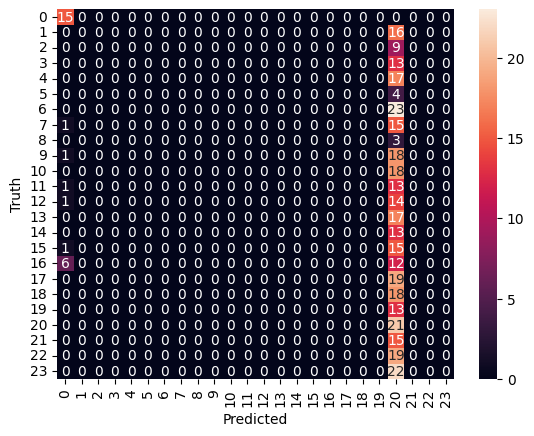

In [90]:
sns.heatmap(CM_Ada,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [91]:
print(f'Validation Accuracy: {val_accuracy:.2f}')
print('Accuracy Score  : ', accuracy_ADA)
print('Precision Score : ', precision_ADA)
print('Recall Score    : ', recall_ADA)
print('f1-Score        : ', f1_ADA)

Validation Accuracy: 0.09
Accuracy Score  :  0.0965
Precision Score :  0.0266
Recall Score    :  0.0833
f1-Score        :  0.0352


##**Bagging**##

In [95]:

Bag = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
Bag.fit(X_train, y_train)

y_pred_val = Ada.predict(X_val)
val_accuracy_BAG = accuracy_score(Y_val, y_pred_val)

y_pred = Bag.predict(X_test)
accuracy_bagg = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_BAG = confusion_matrix(Y_test, y_pred)

precision_BAG = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_BAG = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_BAG = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_BAG = round(accuracy_score(Y_test,y_pred),4)

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        15
           1       0.25      0.12      0.17        16
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.08      0.53      0.14        17
           5       1.00      0.25      0.40         4
           6       0.82      0.39      0.53        23
           7       0.33      0.12      0.18        16
           8       0.00      0.00      0.00         3
           9       0.26      0.63      0.37        19
          10       0.76      0.72      0.74        18
          11       1.00      0.71      0.83        14
          12       0.00      0.00      0.00        15
          13       0.67      0.82      0.74        17
          14       0.56      0.38      0.45        13
          15       0.86      0.38      0.52        16
          16       0.38      0.44      0.41        18
          17       1.00    

Text(50.722222222222214, 0.5, 'Truth')

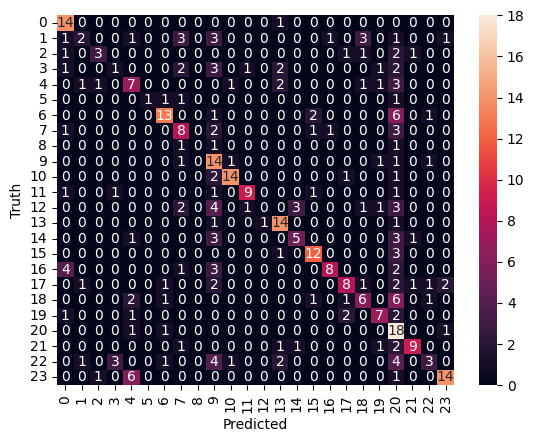

In [93]:
sns.heatmap(CM_BAG,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [96]:
print(f'Validation Accuracy: {val_accuracy_BAG:.2f}')
print('Accuracy Score  : ', accuracy_BAG)
print('Precision Score : ', precision_BAG)
print('Recall Score    : ', recall_BAG)
print('f1-Score        : ', f1_BAG)

Validation Accuracy: 0.09
Accuracy Score  :  0.4102
Precision Score :  0.5199
Recall Score    :  0.3749
f1-Score        :  0.398


##**Naive Bayes**##

In [97]:
NAB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
NAB.fit(X_train, y_train)

y_pred_val = NAB.predict(X_val)
val_accuracy_NAB = accuracy_score(Y_val, y_pred_val)

y_pred = NAB.predict(X_test)
accuracy_NB = accuracy_score(Y_test, y_pred)

print((classification_report(Y_test, y_pred)))
CM_NAB = confusion_matrix(Y_test, y_pred)

precision_NAB = round(precision_score(Y_test,y_pred,average = 'macro'),2)
recall_NAB = round(recall_score(Y_test,y_pred, average = 'macro'),2)
f1_NAB = round(f1_score(Y_test,y_pred, average = 'macro'),2)
accuracy_NAB = round(accuracy_score(Y_test,y_pred),2)

              precision    recall  f1-score   support

           0       0.54      0.93      0.68        15
           1       0.24      0.25      0.24        16
           2       1.00      0.22      0.36         9
           3       0.00      0.00      0.00        13
           4       0.50      0.06      0.11        17
           5       0.00      0.00      0.00         4
           6       0.63      0.52      0.57        23
           7       0.40      0.38      0.39        16
           8       0.00      0.00      0.00         3
           9       0.35      0.74      0.47        19
          10       0.87      0.72      0.79        18
          11       0.71      0.71      0.71        14
          12       0.00      0.00      0.00        15
          13       0.86      0.35      0.50        17
          14       0.67      0.31      0.42        13
          15       0.62      0.50      0.55        16
          16       0.65      0.61      0.63        18
          17       0.89    

Text(50.722222222222214, 0.5, 'Truth')

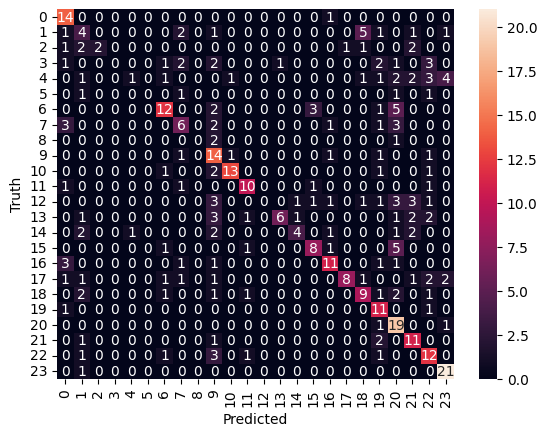

In [98]:
sns.heatmap(CM_NAB,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [99]:
print(f'Validation Accuracy: {val_accuracy_NAB:.2f}')
print('Accuracy Score  : ', accuracy_NAB)
print('Precision Score : ', precision_NAB)
print('Recall Score    : ', recall_NAB)
print('f1-Score        : ', f1_NAB)

Validation Accuracy: 0.52
Accuracy Score  :  0.53
Precision Score :  0.49
Recall Score    :  0.47
f1-Score        :  0.44


##**Gradient Boosting**##

In [100]:
GradB = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
GradB .fit(X_train, y_train)

y_pred_val = GradB.predict(X_val)
val_accuracy_GRADB = accuracy_score(Y_val, y_pred_val)

y_pred = GradB .predict(X_test)
accuracy_GradientBoost = accuracy_score(Y_test, y_pred)

print((GradB,classification_report(Y_test, y_pred)))
CM_GRAD = confusion_matrix(Y_test, y_pred)

precision_GradB  = round(precision_score(Y_test,y_pred,average = 'macro'),4)
recall_GradB  = round(recall_score(Y_test,y_pred, average = 'macro'),4)
f1_GradB  = round(f1_score(Y_test,y_pred, average = 'macro'),4)
accuracy_GradB  = round(accuracy_score(Y_test,y_pred),4)

(GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0), '              precision    recall  f1-score   support\n\n           0       0.62      0.67      0.65        15\n           1       0.55      0.38      0.44        16\n           2       0.45      0.56      0.50         9\n           3       0.07      0.23      0.11        13\n           4       0.37      0.41      0.39        17\n           5       0.00      0.00      0.00         4\n           6       0.64      0.70      0.67        23\n           7       0.73      0.50      0.59        16\n           8       0.50      0.67      0.57         3\n           9       0.38      0.32      0.34        19\n          10       0.93      0.72      0.81        18\n          11       0.80      0.57      0.67        14\n          12       0.37      0.47      0.41        15\n          13       0.94      0.88      0.91        17\n          14       0.56      0.38      0.45        13\n          15       0.70      0.88      0

Text(50.722222222222214, 0.5, 'Truth')

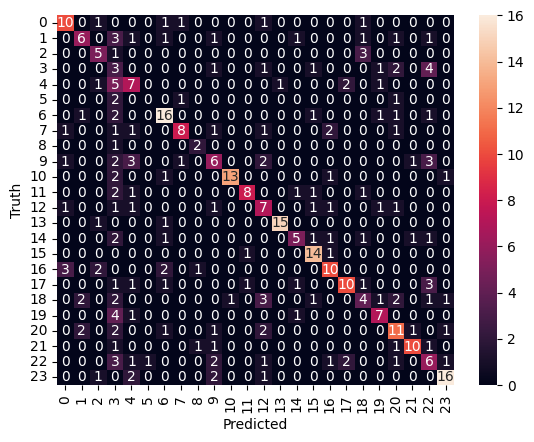

In [101]:
sns.heatmap(CM_GRAD,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [102]:
print(f'Validation Accuracy: {val_accuracy_GRADB:.2f}')
print('Accuracy Score  : ', accuracy_GradB)
print('Precision Score : ', precision_GradB)
print('Recall Score    : ', recall_GradB)
print('f1-Score        : ', f1_GradB)

Validation Accuracy: 0.56
Accuracy Score  :  0.5335
Precision Score :  0.549
Recall Score    :  0.5165
f1-Score        :  0.5246


##**EVERYTHING IN ONE VIEW**##

In [103]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'K-Nearest Neighbors', 'BAGGING'], 'Accuracy' : [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_NAB, accuracy_DT, accuracy_ADA, accuracy_GradB, accuracy_knn, accuracy_BAG], 'Precision Score' : [precision_lr, precision_svm, precision_rf, precision_NAB, precision_DT, precision_ADA, precision_GradB, precision_knn, precision_BAG], 'Recall Score' : [recall_lr, recall_svm, recall_rf, recall_NAB, recall_DT, recall_ADA, recall_GradB, recall_knn, recall_BAG], 'F1_Score' : [f1_lr, f1_svm, f1_rf, f1_NAB, f1_DT, f1_ADA, f1_GradB, f1_knn, f1_BAG]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,AdaBoost Classifier,0.0965,0.0266,0.0833,0.0352
1,BAGGING,0.4102,0.5199,0.3749,0.3980
2,Naive-Bayes Classifier,0.5300,0.4900,0.4700,0.4400
3,Gradient Boosting Classifier,0.5335,0.5490,0.5165,0.5246
4,Decision Tree Classifier,0.5400,0.5000,0.5000,0.4900
5,K-Nearest Neighbors,0.5442,0.5195,0.4941,0.4660
6,SVM Classifier,0.5952,0.5542,0.5409,0.5339
7,Random Forest Classifier,0.6139,0.5963,0.5620,0.5384
8,Logistic Regression,0.6327,0.5580,0.5731,0.5504


In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

texts = Raw_data['Resume_str']
category = Raw_data['Category']


label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(category)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_length = max([len(seq) for seq in sequences])
sequences = sequence.pad_sequences(sequences, maxlen=max_sequence_length)


X_train, X_test, y_train, y_test = train_test_split(sequences, category, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5, batch_size=32)


loss,accuracy = model.evaluate(X_test, y_test)
print("Accuracy of CNN model:", accuracy)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 602ms/step - accuracy: 0.0490 - loss: 3.3199
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.0564 - loss: 3.1236
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 617ms/step - accuracy: 0.0971 - loss: 2.9006
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.3808 - loss: 2.0459
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 605ms/step - accuracy: 0.8168 - loss: 0.8281
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.3108 - loss: 2.7661
Accuracy of CNN model: [2.8271379470825195, 0.31991952657699585]


##**Save Model**##

In [53]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(DT, open('model.pkl', 'wb'))